In [5]:
# Plot preparation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## Plot (point)

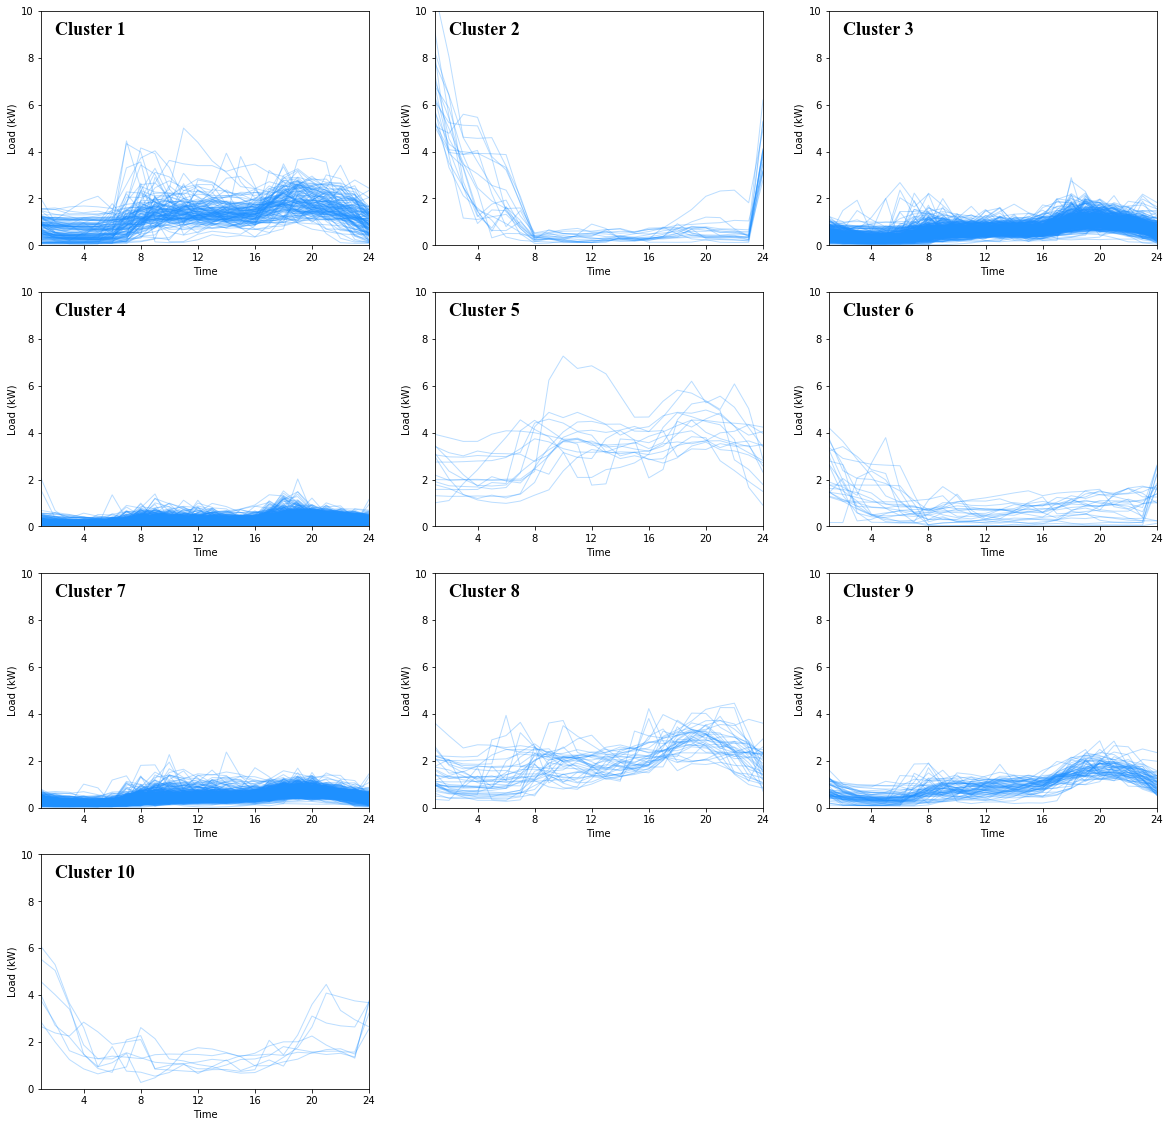

In [6]:
data_set = 'London_2013'
method = 'hierarchical/euclidean'
# method = 'kmeans'
num_clusters = 10
month = 1


attr = pd.read_csv('../data/' + data_set + '_attr_final.csv')
labels = pd.read_csv('../result/' + data_set + '/clustering/point/' + method + '/n_clusters_' + str(num_clusters) + '.csv', header=None)
# labels = pd.read_csv('../result/' + data_set + '/clustering/point/' + method + '/n_clusters_' + str(num_clusters) + '_acorn.csv', header=None)


plt.figure(figsize=(20,25))
for k in range(num_clusters):
    plt.subplot(5, 3, k+1)
    for i in range(len(attr)):
        id = attr['ID'][i]
        df = pd.read_csv('../data/' + data_set + '_profiles/' + str(id) + '.csv', header=None).values
        if labels[month-1][i] == k:
            plt.plot(list(range(1, 25)), df[month-1], alpha=0.3, color='dodgerblue', linewidth=1)

    # Plot Parameters
    plt.xlabel('Time')
    plt.ylabel('Load (kW)')
    new_ticks = np.floor(np.linspace(0, 24, 7))
    plt.xticks(new_ticks)
    plt.xlim(1, 24)
    plt.ylim(0, 10)
    text = 'Cluster %d' %(k+1)
    plt.text(2, 9, text, fontdict={'size': 18, 'family': 'Times New Roman', 'color': 'black'})

## Plot (interval)

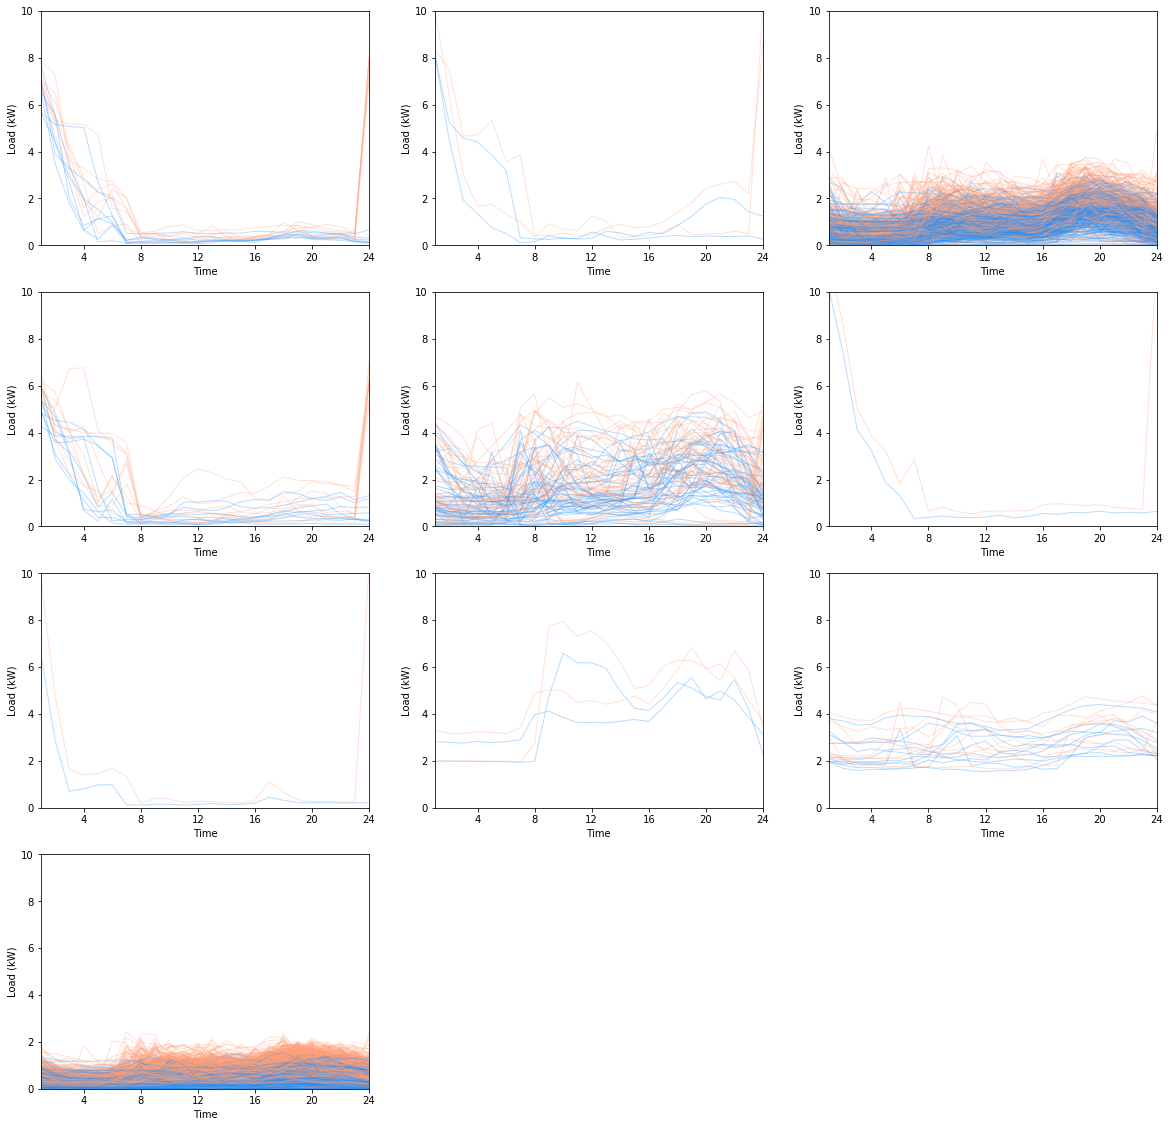

In [7]:
data_set = 'London_2013'
method = 'hierarchical/hausdorff'
# method = 'kmeans'
num_clusters = 10
month = 1


attr = pd.read_csv('../data/' + data_set + '_attr_final.csv')
labels = pd.read_csv('../result/' + data_set + '/clustering/interval/' + method + '/n_clusters_' + str(num_clusters) + '.csv', header=None)


# Plot
plt.figure(figsize=(20,25))
for k in range(num_clusters):
    plt.subplot(5, 3, k+1)
    for i in range(len(attr)):
        id = attr['ID'][i]
        df = pd.read_csv('../data/' + data_set + '_profiles_interval/' + str(id) + '.csv', header=None).values
        if labels[month-1][i] == k:
            plt.plot(list(range(1, 25)), df[month*2-2], alpha=0.3, color='dodgerblue', linewidth=1)
            plt.plot(list(range(1, 25)), df[month*2-1], alpha=0.3, color='lightsalmon', linewidth=1)

    # Plot Parameters
    plt.xlabel('Time')
    plt.ylabel('Load (kW)')
    new_ticks = np.floor(np.linspace(0, 24, 7))
    plt.xticks(new_ticks)
    plt.xlim(1, 24)
    plt.ylim(0, 10)

## Plot Acorn groups

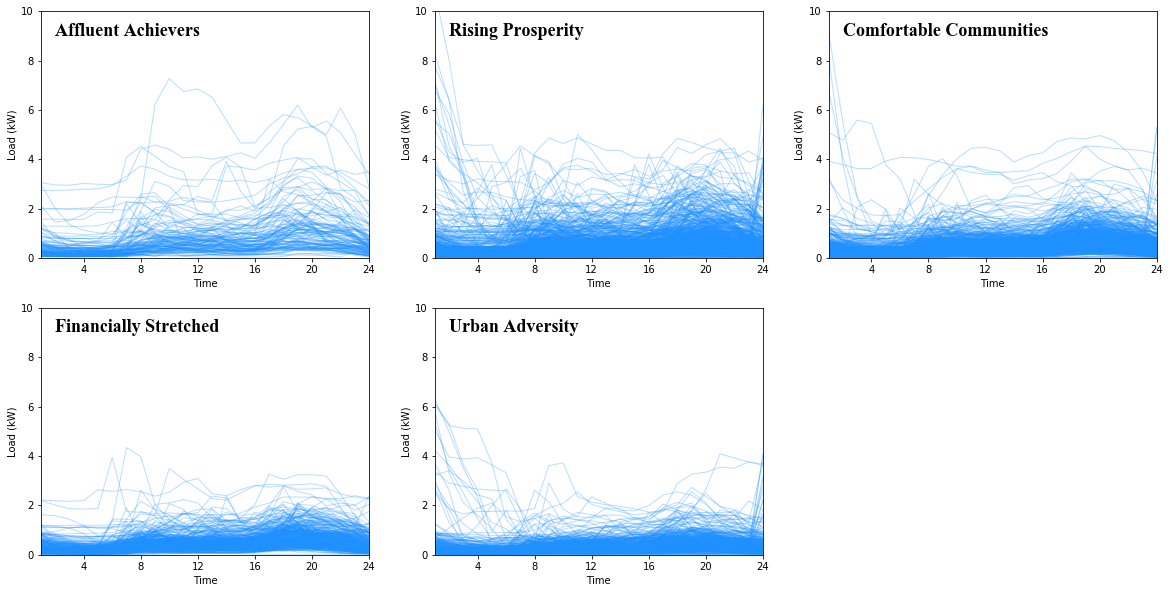

In [8]:
# Plot (according to Acorn groups)
month = 1
data_set = 'London_2013'
category = ['Affluent Achievers', 'Rising Prosperity', 'Comfortable Communities', 'Financially Stretched', 'Urban Adversity']
attr = pd.read_csv('../data/' + data_set + '_attr_final.csv')


plt.figure(figsize=(20,10))
for k in range(5):
    plt.subplot(2, 3, k+1)
    for i in range(len(attr)):
        id = attr['ID'][i]
        df = pd.read_csv('../data/' + data_set + '_profiles/' + str(id) + '.csv', header=None).values
        if attr['Cate'][i] == k+1:
            plt.plot(list(range(1, 25)), df[month-1], alpha=0.3, color='dodgerblue', linewidth=1)

    # Plot Parameters
    plt.xlabel('Time')
    plt.ylabel('Load (kW)')
    new_ticks = np.floor(np.linspace(0, 24, 7))
    plt.xticks(new_ticks)
    plt.xlim(1, 24)
    plt.ylim(0, 10)
    text = category[k]
    plt.text(2, 9, text, fontdict={'size': 18, 'family': 'Times New Roman', 'color': 'black'})